<a href="https://colab.research.google.com/github/AnshulSingh-eZ/Machine_Learning_Lab_23CS067/blob/main/Exp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 10.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:


df = pd.read_csv('/content/spam.csv')
df.head()



,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape


(5572, 2)

In [5]:
#check null values
df.isnull().sum()

,0
Category,0
Message,0


In [6]:
#find duplicates and drop (inplace=True)
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [ ]:
df.duplicated().any()


np.False_

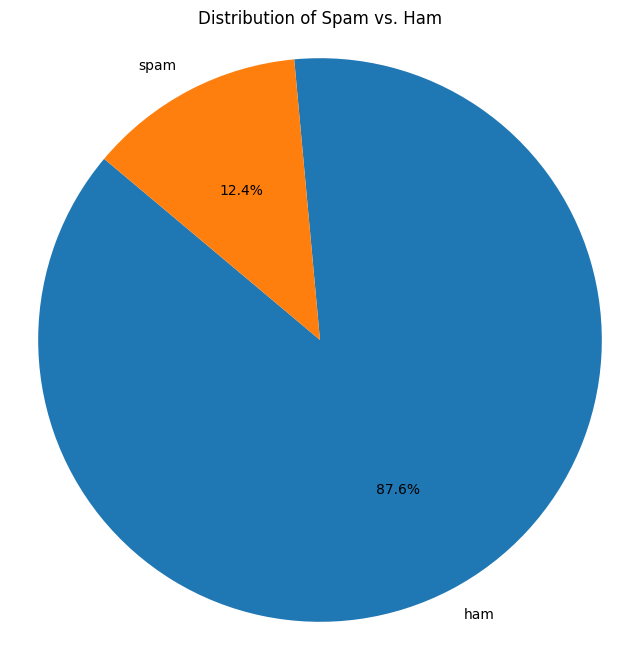

In [ ]:
category_counts = df['Category'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#TEXT VISUALIZATION

- Iterate through unique categories: This loop iterates through each unique category in the 'Category' column of the DataFrame df.¶
- Filter the DataFrame for the current category: Inside the loop, the code filters the DataFrame df to create a new DataFrame filtered_df containing only the rows where the 'Category' column matches the current category.
- Concatenate all text data for the current category: The code then concatenates all the text data from the 'Message' column of filtered_df into a single string variable named text.
- Generate word cloud: Using the concatenated text data (text), the code generates a word cloud using the WordCloud module. The word cloud is configured to have a width of 800 pixels, a height of 400 pixels, and a white background.
- Plot the word cloud: Finally, the code plots the generated word cloud using Matplotlib. Each word's size in the word cloud is proportional to its frequency in the concatenated text data. The title of each word cloud plot includes the current category being processed. The plt.axis('off') command is used to hide the axes of the plot.
This process repeats for each unique category, generating a separate word cloud for each category based on the text data associated with that category.

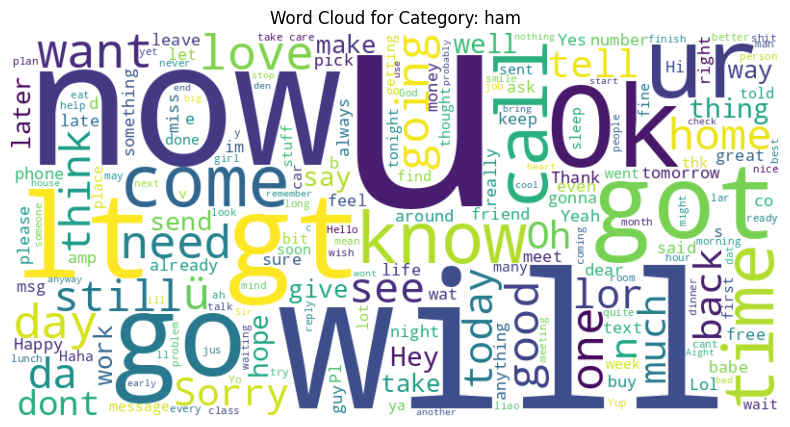

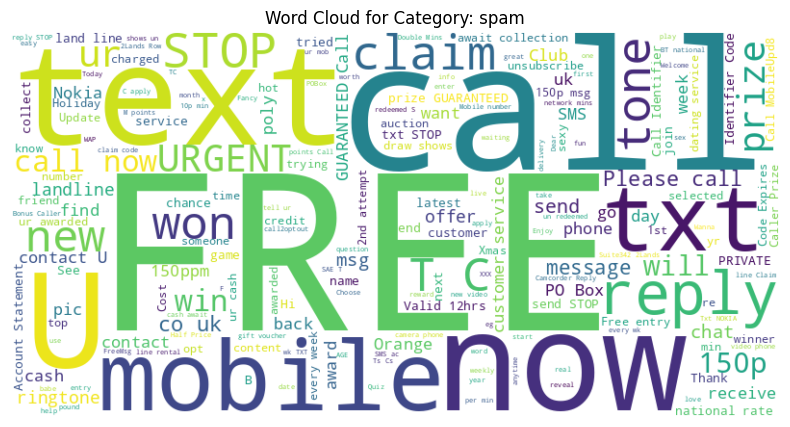

In [ ]:
for category in df['Category'].unique():
    filtered_df = df[df['Category'] == category]

    text = ' '.join(filtered_df['Message'])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [10]:
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

#Text Preprocessing

1. Lower Casing¶
2. Remove Extra White Spaces
3. Remove HTML Tags
4. Remove URLs
5. Remove Punctuations
6. Remove Special Characters
7. Remove Numeric Values
8. Remove Non-alpha Numeric

10. Handling StopWords¶
11. Handling Emojis
12. Stemming



In [11]:
# Convert 'Text' column to lowercase

df['Message'] = df['Message'].str.lower()
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
# Remove extra white spaces from the 'Text' column
df['Message'] = df['Message'].str.strip()
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
# Function to remove HTML tags from text
def remove_html_tags(text):
    html_tags = BeautifulSoup(text, "html.parser")
    for data in html_tags(['style', 'script']):
      data.decompose()
    return ' '.join(html_tags.stripped_strings)
df['Message'] = df['Message'].apply(remove_html_tags)

In [ ]:
# Define a function to remove URLs using regular expressions
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    cleaned_text = url_pattern.sub('', text)
    return cleaned_text

df['Message'] = df['Message'].apply(remove_urls)
df.head(10)


,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
5,1,freemsg hey there darling it's been 3 week's n...
6,0,even my brother is not like to speak with me. ...
7,0,as per your request 'melle melle (oru minnamin...
8,1,winner!! as a valued network customer you have...
9,1,had your mobile 11 months or more? u r entitle...


In [ ]:


def remove_special_characters(text):
    # Define the pattern to match special characters
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return clean_text

df['Message'] = df['Message'].apply(remove_special_characters)

df.head(10)

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
5,1,freemsg hey there darling its been 3 weeks now...
6,0,even my brother is not like to speak with me t...
7,0,as per your request melle melle oru minnaminun...
8,1,winner as a valued network customer you have b...
9,1,had your mobile 11 months or more u r entitled...


In [ ]:
# Function to remove numeric values from text
def remove_numeric(text):
    non_numeric_text = re.sub(r'\d', '', text)
    return non_numeric_text

df['Message'] = df['Message'].apply(remove_numeric)
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [ ]:
# Define a function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    non_alpha_text = re.sub(r'[^a-zA-Z]\s', '', text)
    return non_alpha_text

df['Message'] = df['Message'].apply(remove_non_alphanumeric)

df.head(10)

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry ina wkly comp to win fa cup final t...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
5,1,freemsg hey there darling its beenweeks now an...
6,0,even my brother is not like to speak with me t...
7,0,as per your request melle melle oru minnaminun...
8,1,winner as a valued network customer you have b...
9,1,had your mobilemonths or more u r entitled to ...


In [18]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [19]:
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry ina wkly comp to win fa cup final t...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [ ]:

# Function to replace chat words with their full forms
def replace_chat_words(text):
    for abbr, fullform in chat_words.items():
      text = text.replace(abbr, fullform)
    return text

df['Message'] = df['Message'].apply(replace_chat_words)
df.head(10)

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry ina wkly comp to win fa cup final t...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
5,1,freemsg hey there darling its beenweeks now an...
6,0,even my brother is not like to speak with me t...
7,0,as per your request melle melle oru minnaminun...
8,1,winner as a valued network customer you have b...
9,1,had your mobilemonths or more u r entitled to ...


In [ ]:
# Download NLTK stopwords corpus
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['Message'] = df['Message'].apply(remove_stopwords)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

df['Message'] = df['Message'].apply(remove_emojis)


In [23]:
# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_stemmed'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))
df.head()


,Category,Message,Message_stemmed
0,0,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,ok lar joke wif u oni
2,1,free entry ina wkly comp win fa cup final tkts...,free entri ina wkli comp win fa cup final tkt ...
3,0,u dun say early hor u c already say,u dun say earli hor u c alreadi say
4,0,nah dont think goes usf lives around though,nah dont think goe usf live around though


In [39]:
#Convert text to numbers using bag of words
# vectorizer=CountVectorizer()
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X=vectorizer.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']


In [40]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
print(y_train)

2598    0
5418    0
99      0
2321    0
2388    0
       ..
4750    0
474     1
3273    0
4022    0
882     0
Name: Category, Length: 4125, dtype: int64


#Solve this problem using Logistic Regression(using numpy from scratch)

In [35]:
class LRScratch:
    def __init__(self, learning_rate=0.01, epochs=1000, reg_strength=0):
        self.lr = learning_rate
        self.epochs = epochs
        self.reg_strength = reg_strength
        self.losses = []
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def fit(self, X, y):
        self.m,self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for i in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            # dw = (1/self.m)*np.dot(X.T, (y_pred-y))
            dw = (1/self.m)*np.dot(X.T, (y_pred-y)) + (self.reg_strength/self.m)*self.weights
            db = (1/self.m)*np.sum(y_pred-y)
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
            loss = -(1/self.m)*np.sum(y*np.log(y_pred+1e-9) + (1-y)*np.log(1-y_pred+1e-9))
            self.losses.append(loss)


    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_pred]


## Using CountVectorizer()

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = LRScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9796511627906976
Precision: 0.9259259259259259
Recall: 0.9191176470588235
F1 Score: 0.922509225092251
Confusion Matrix:
 [[886  10]
 [ 11 125]]


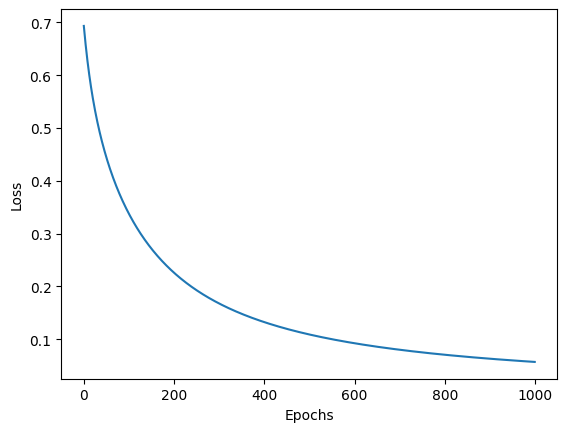

In [37]:
plt.plot(range(len(model.losses)), model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


## Using TfidfVectorizer() - Accuracy dropped from 97.96 to 97.09

## Precision also dropped from 92.5% to 86.8%

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = LRScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9709302325581395
Precision: 0.8680555555555556
Recall: 0.9191176470588235
F1 Score: 0.8928571428571429
Confusion Matrix:
 [[877  19]
 [ 11 125]]


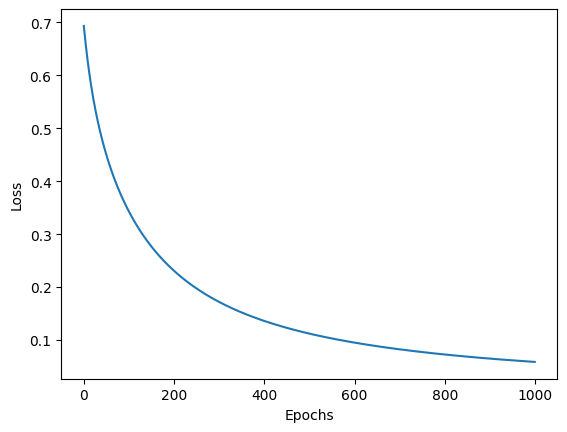

In [44]:
plt.plot(range(len(model.losses)), model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


#Now Use sklearn library to fit the data using logistic regression and compare results

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [50]:
scaler = StandardScaler(with_mean=False)   # use with_mean=False because sparse matrix
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [52]:
y_pred = model.predict(X_test_scaled)

In [53]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9689922480620154
Precision: 0.9906542056074766
Recall: 0.7737226277372263
F1 Score: 0.8688524590163934
Confusion Matrix:
 [[894   1]
 [ 31 106]]


### When used scikit-learn Logistic Regression, there are a number of observations that can be made :

### Accuracy of scratch model was around 92%, but scikit-learn's model outpassed previous as it attained 96.89% accuracy.

### Precision of 99.06% is really good and model is now predicting only 1 false positive.